# TODO
- Exploit temperature data
- Explore more usable data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from config import *

,Age,M14,M15,O6,O14,O15,O16
0,-62,0.000000,0.000000,0.002154,0.035203,0.059449,0.000000
1,-52,0.000000,0.002368,0.049548,0.020643,0.099554,0.000000
2,-42,0.008666,0.007328,0.017502,0.010129,0.010383,0.025594
3,-32,0.003736,0.025032,0.019608,0.010045,0.012183,0.008830
4,-22,0.014700,0.045777,0.040944,0.022560,0.048076,0.033579
...,...,...,...,...,...,...,...
1360,13538,0.000000,0.002627,0.000000,0.000000,0.000000,0.000000
1361,13548,0.000000,0.002469,0.000000,0.000000,0.000000,0.000000
1362,13558,0.000000,0.000926,0.000000,0.000000,0.000000,0.000000
1363,13568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,Age,M15
0,-62,0.000000
1,-52,0.002368
2,-42,0.007328
3,-32,0.025032
4,-22,0.045777
...,...,...
1360,13538,0.002627
1361,13548,0.002469
1362,13558,0.000926
1363,13568,0.000000


<Axes: xlabel='Age', ylabel='M15'>

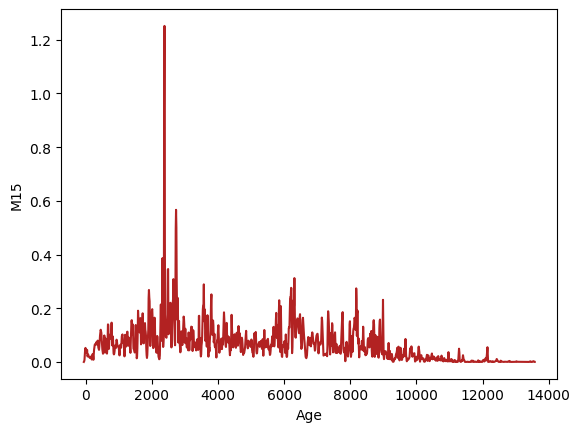

In [2]:
# Extract charcoal data
df_charcoal = pd.read_excel("data/boreal_forest/DATA_ONT_MT_20231124.xlsx", sheet_name="All_sites_char_influx_reechanti")
display(df_charcoal)

# Keep only M15
df_charcoal = df_charcoal[["Age", CHARCOAL_ID]]
display(df_charcoal)

sns.lineplot(df_charcoal, x="Age", y=CHARCOAL_ID, color="firebrick")

In [3]:
df_pollen = pd.read_csv("data/boreal_forest/"+CHARCOAL_ID+"_spec.csv")
df_pollen = df_pollen.rename(columns={"Profondeur": "Depth"})
df_pollen.columns = df_pollen.columns.str.strip()
display(df_pollen)

,Depth,Abies,Juniperus,Larix,Picea,Pinus,Tsuga,Acer,Alnus,Betula,...,Myrica,Phytolithe,Poaceae,Rosaceae,Sarcobatus,Thalictrum,Typha,Spore monolete,Spore trilete,Aquatics
0,570,1.095890,0.273973,1.917808,16.712329,53.698630,0.000000,0.000000,1.917808,8.219178,...,0.547945,0.273973,1.369863,0.000000,0.000000,0.000000,0.273973,0.00000,0.000000,0.000000
1,580,0.906344,0.302115,0.604230,13.897281,62.235650,0.302115,0.000000,0.604230,10.574018,...,0.000000,0.000000,1.208459,0.000000,0.000000,0.000000,0.000000,0.60423,0.302115,0.000000
2,590,0.840336,0.840336,1.680672,14.005602,59.383753,0.000000,0.000000,0.560224,9.523810,...,0.280112,0.000000,1.400560,0.000000,0.000000,0.000000,0.280112,0.00000,0.000000,0.000000
3,600,1.056338,0.264085,2.640845,12.147887,52.816901,0.000000,0.000000,5.545775,13.204225,...,0.528169,0.000000,1.584507,0.264085,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,610,1.744186,0.000000,1.744186,16.694352,55.315615,0.000000,0.249169,0.996678,9.219269,...,0.498339,0.000000,4.235880,0.000000,0.000000,0.249169,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1140,0.000000,0.307062,2.456499,25.793245,31.320368,0.000000,0.000000,0.307062,21.494371,...,0.307062,0.000000,3.991812,0.000000,0.000000,0.000000,1.535312,0.00000,0.000000,0.000000
58,1150,0.000000,0.568182,1.136364,13.068182,51.704545,0.000000,0.000000,0.000000,15.909091,...,0.568182,0.000000,5.681818,0.000000,0.284091,0.000000,0.284091,0.00000,0.000000,0.284091
59,1160,0.000000,1.863354,0.621118,10.559006,57.142857,0.000000,0.000000,0.310559,12.422360,...,0.310559,0.000000,3.416149,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
60,1170,0.000000,0.595238,1.785714,17.559524,54.166667,0.000000,0.000000,0.000000,10.119048,...,0.000000,0.000000,3.273810,0.000000,0.000000,0.000000,0.297619,0.00000,0.000000,0.297619


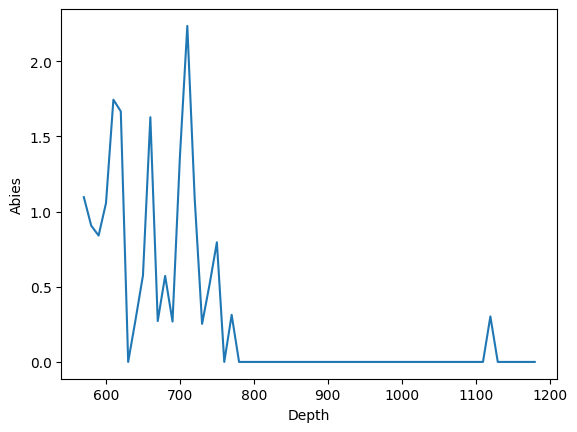

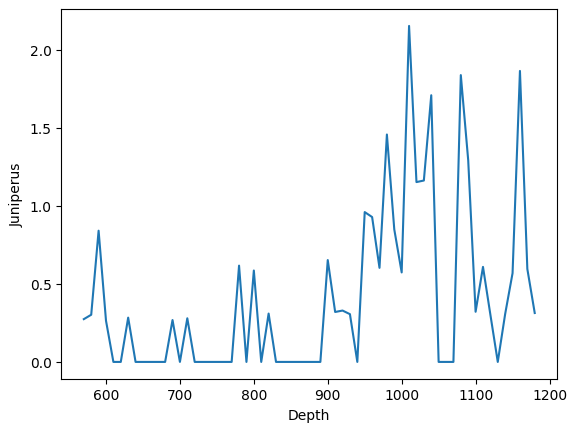

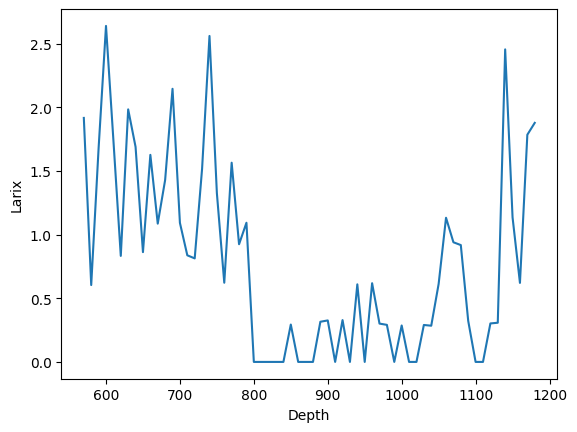

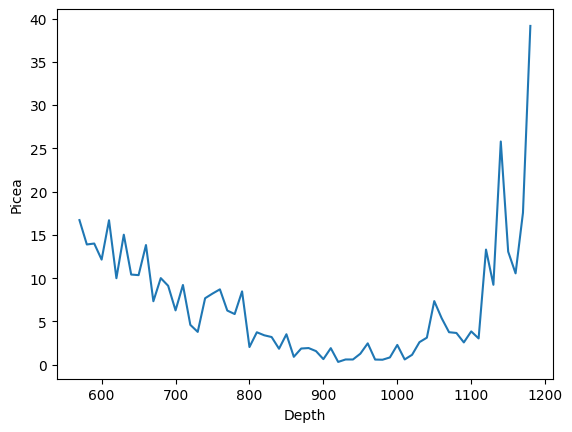

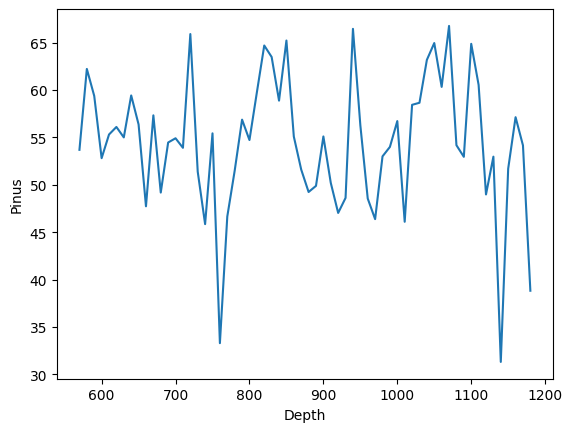

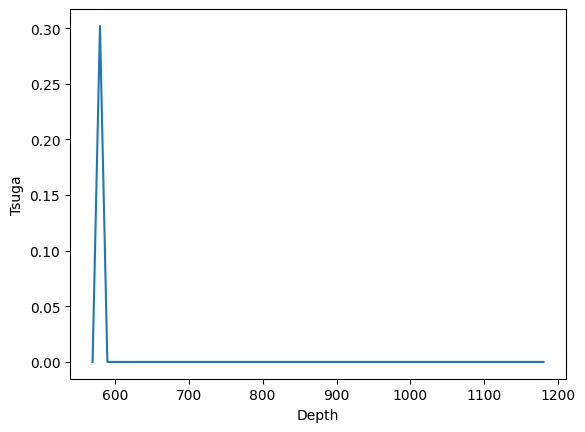

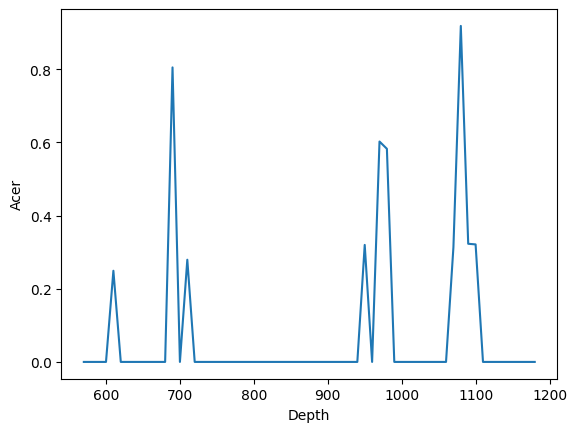

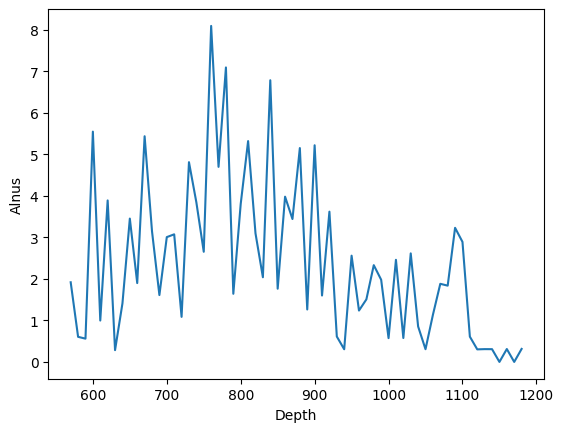

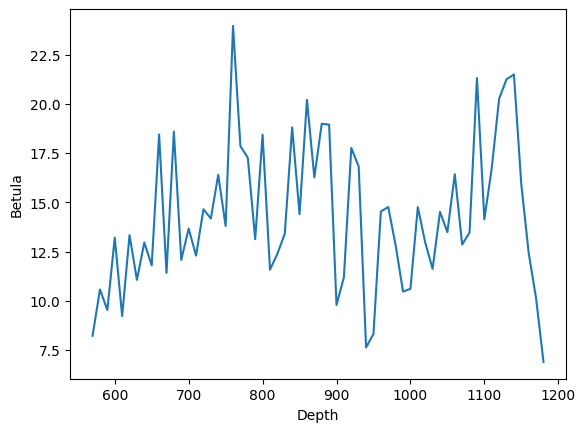

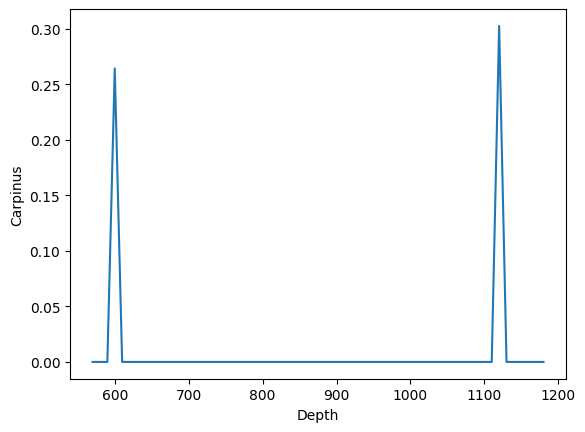

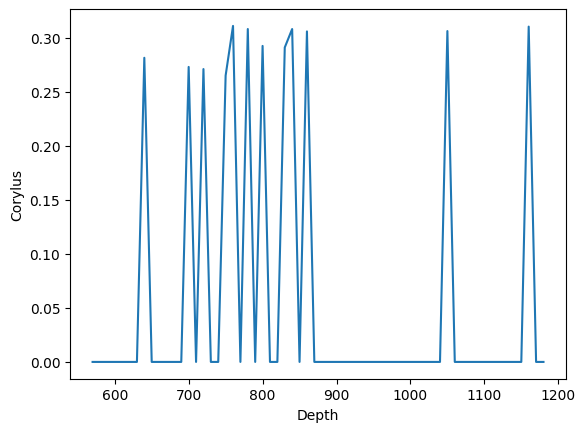

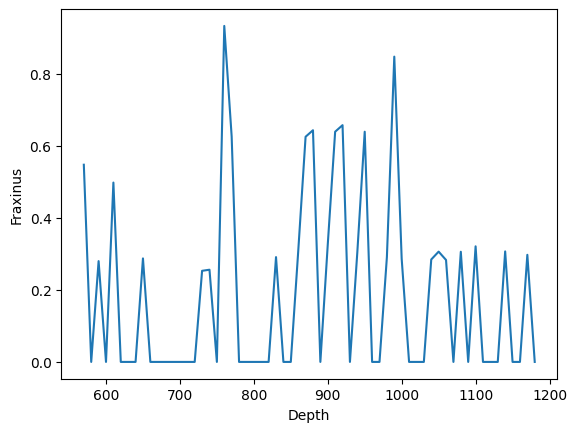

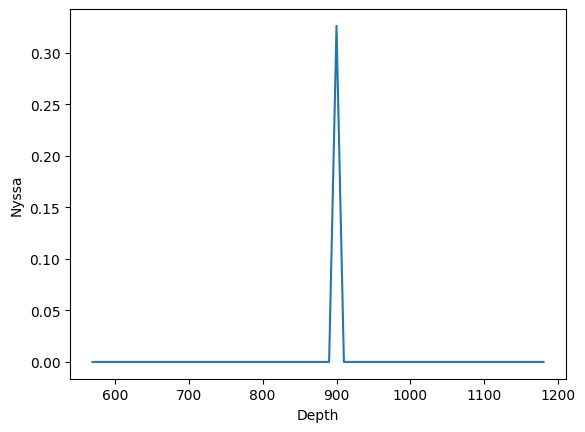

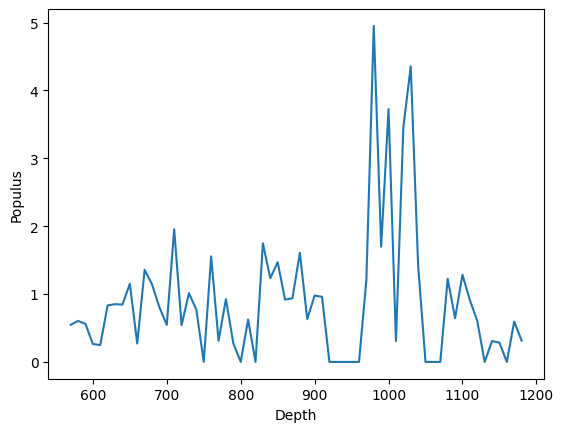

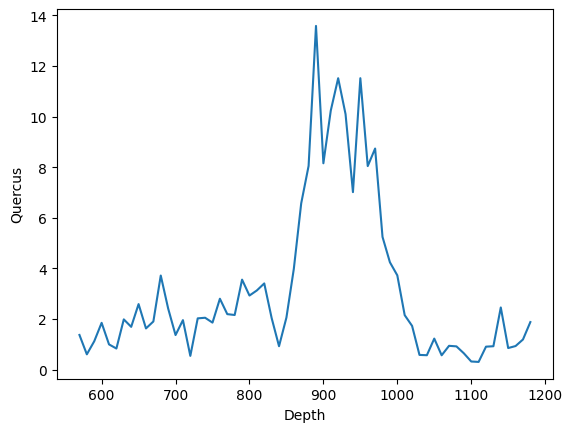

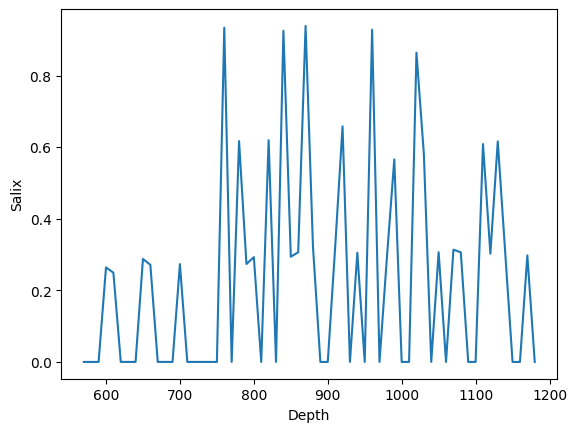

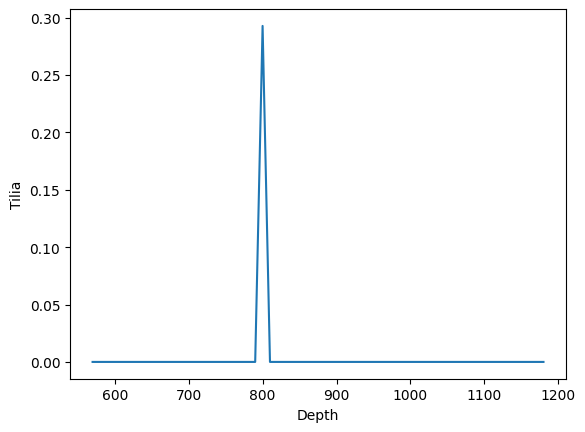

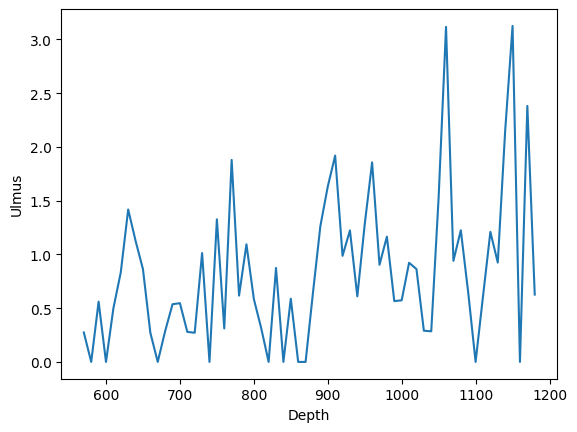

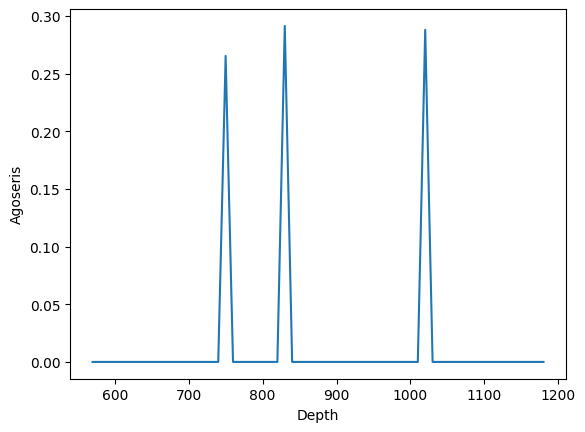

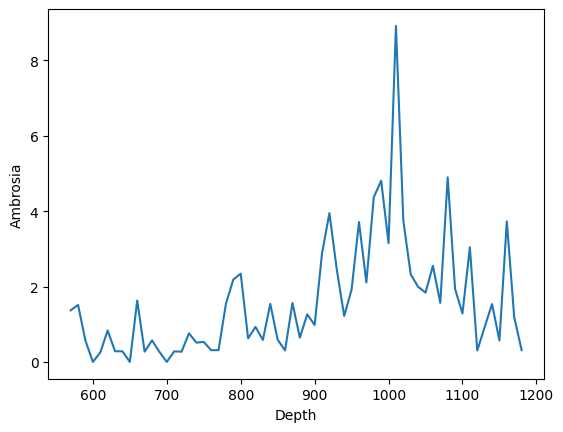

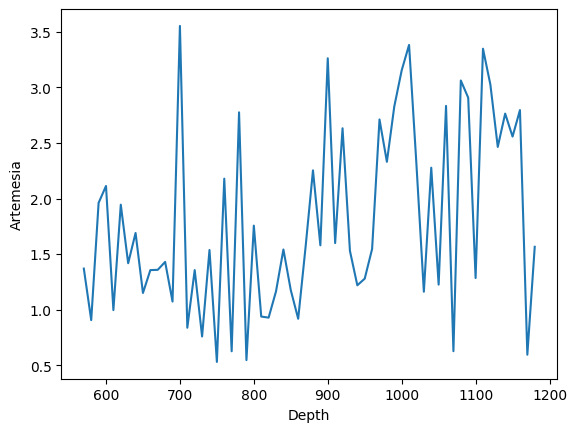

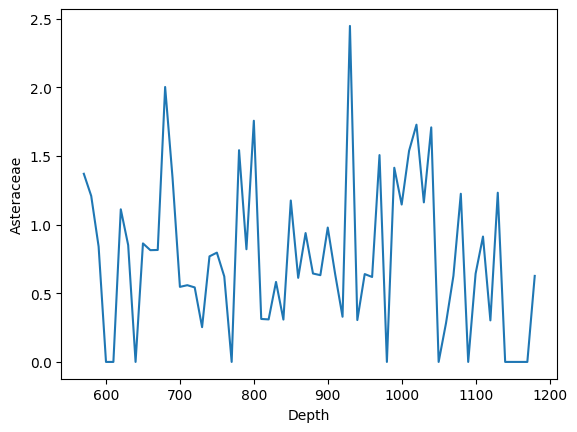

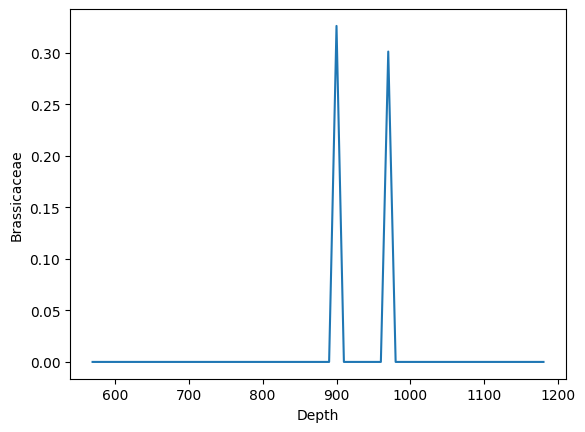

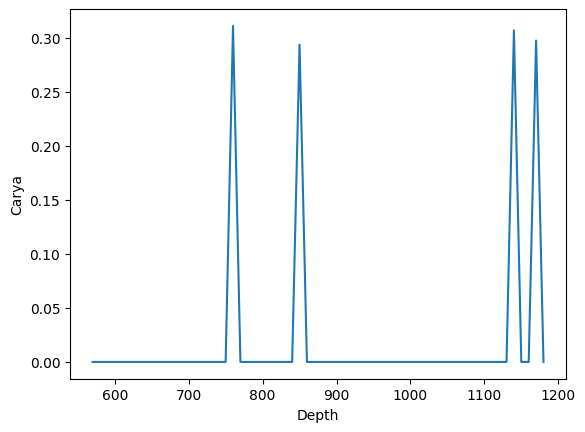

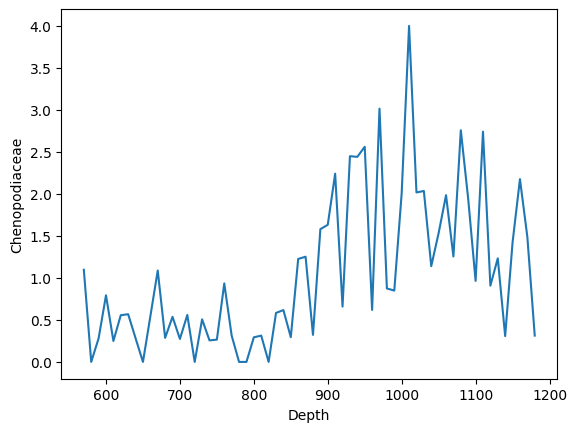

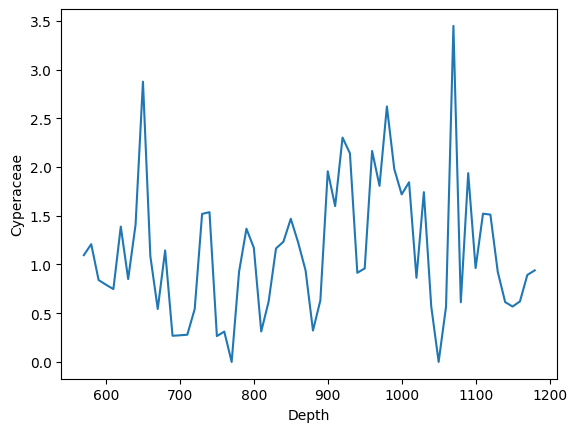

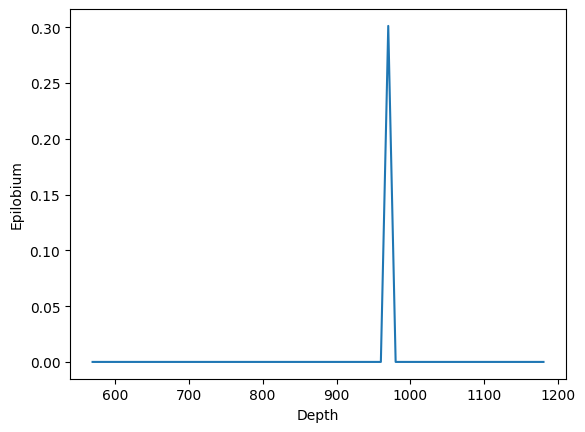

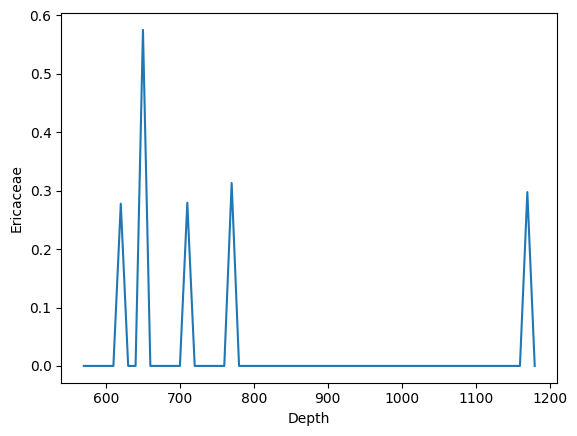

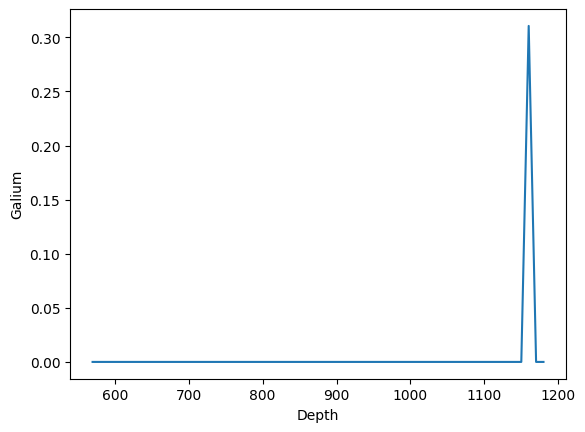

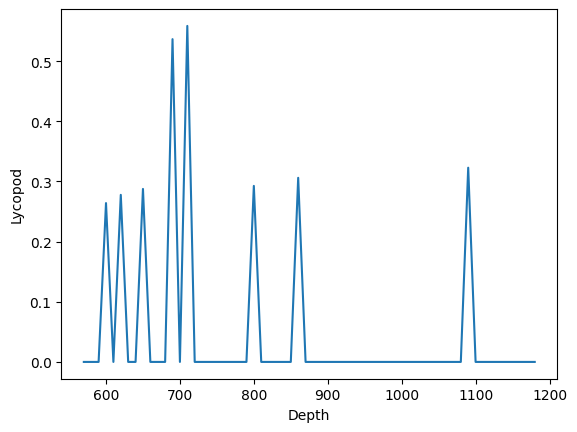

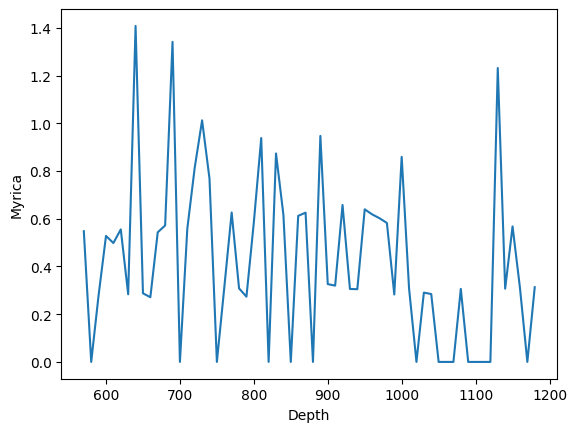

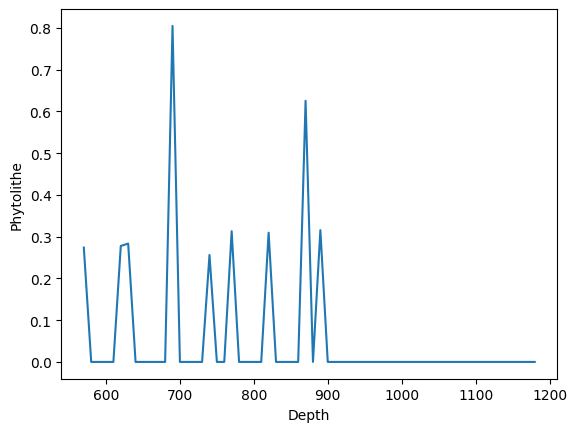

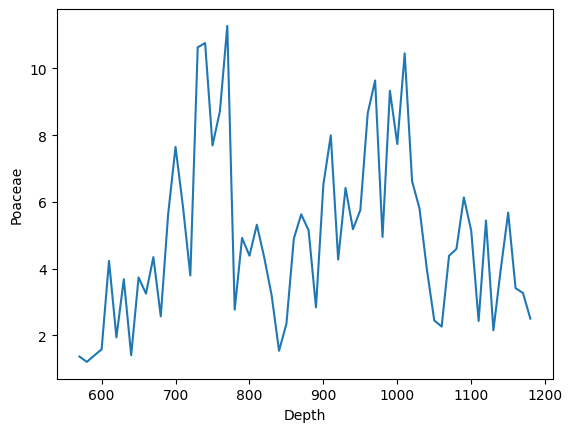

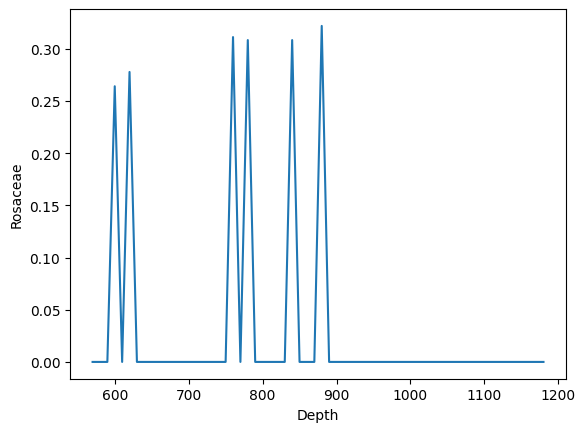

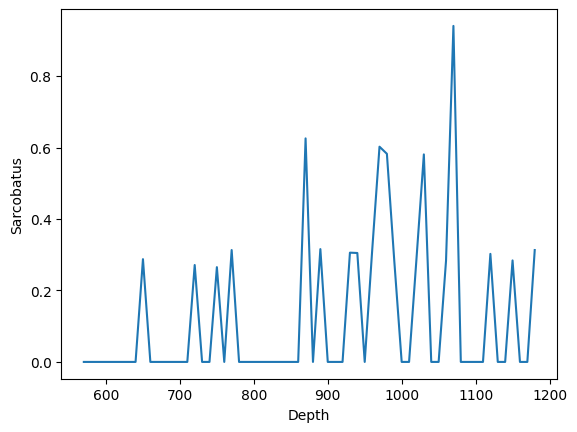

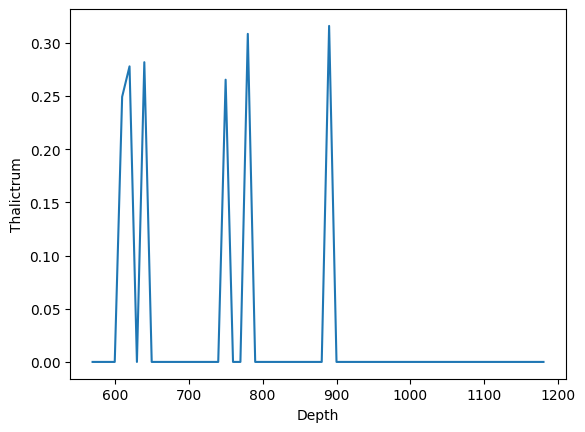

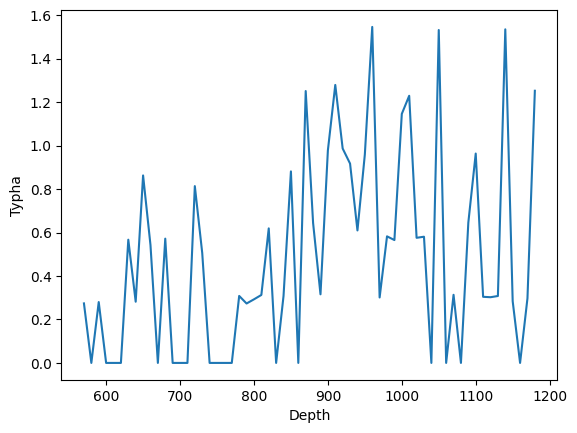

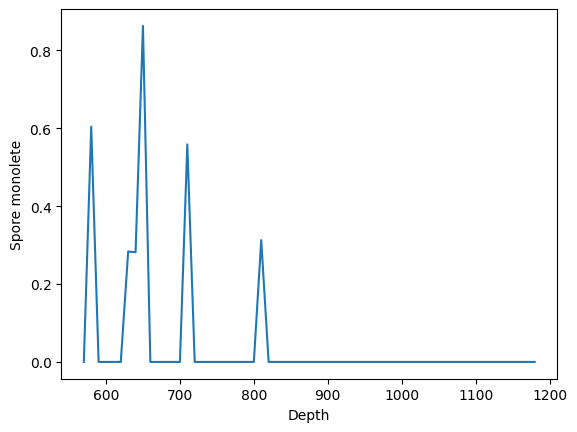

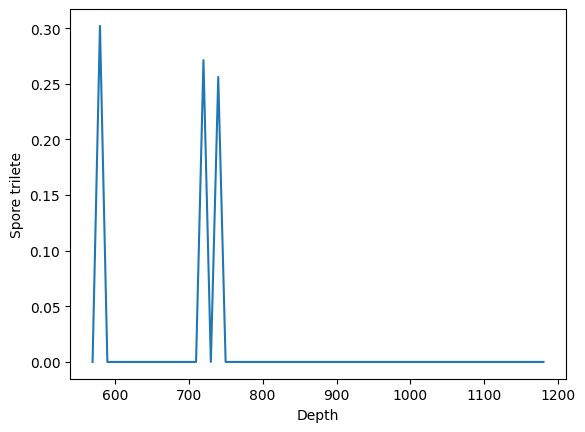

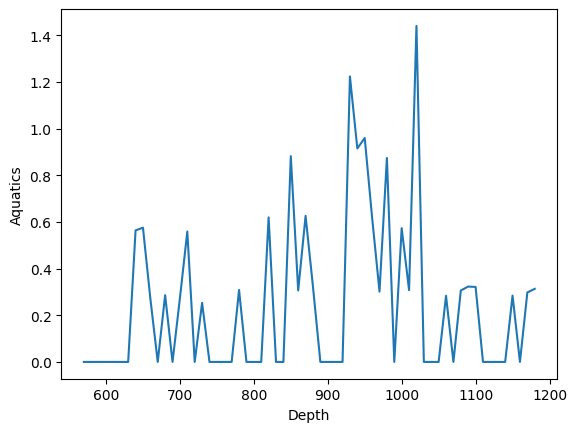

<Figure size 640x480 with 0 Axes>

In [4]:
if DEBUG:
    for col in df_pollen.columns:
        if col != "Depth":
            sns.lineplot(df_pollen, x="Depth", y=col)
            plt.show()
            plt.clf()

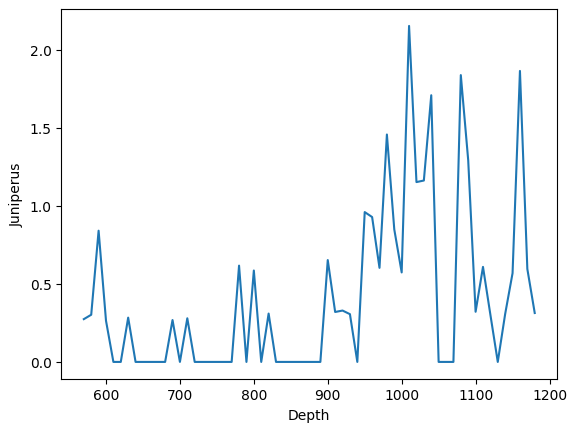

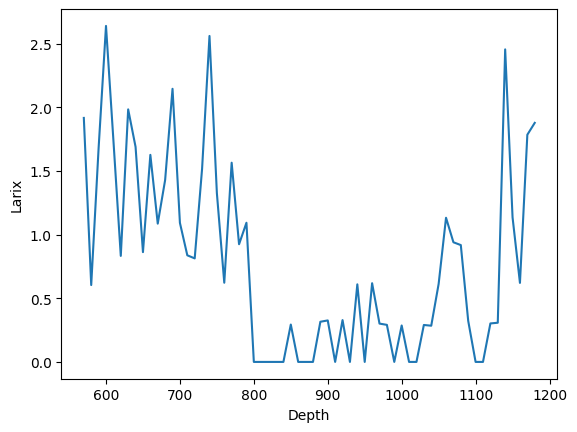

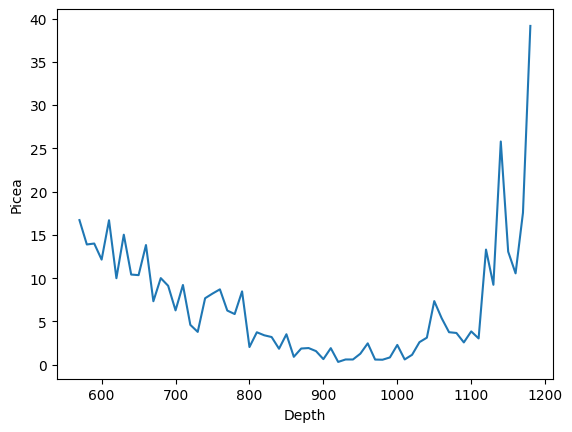

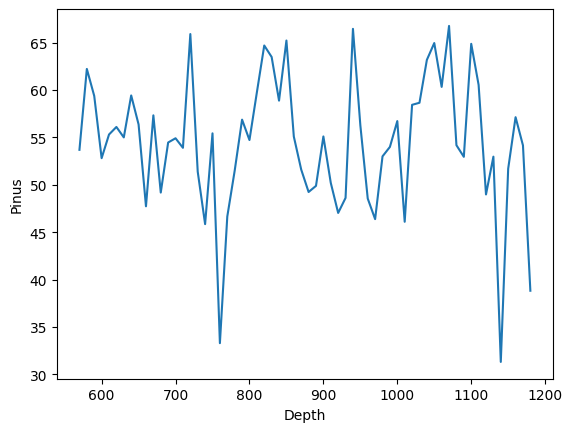

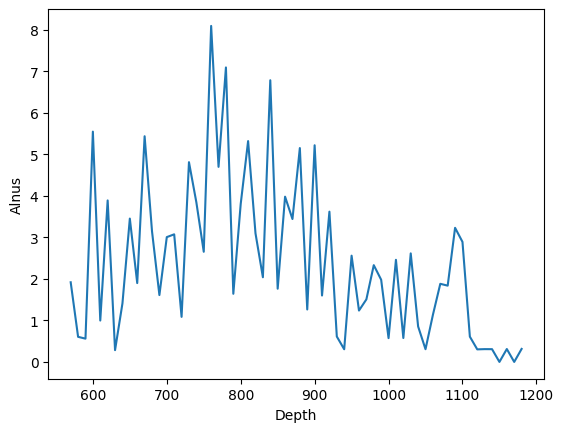

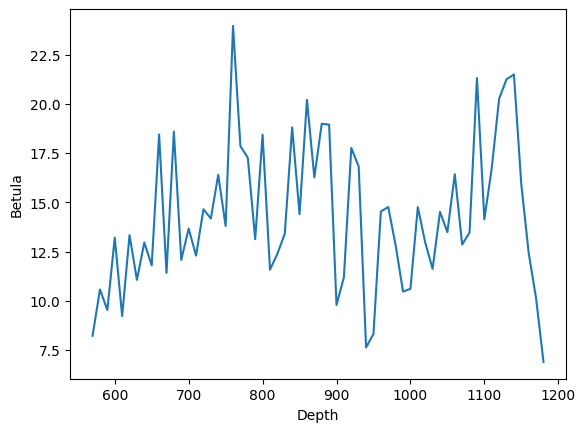

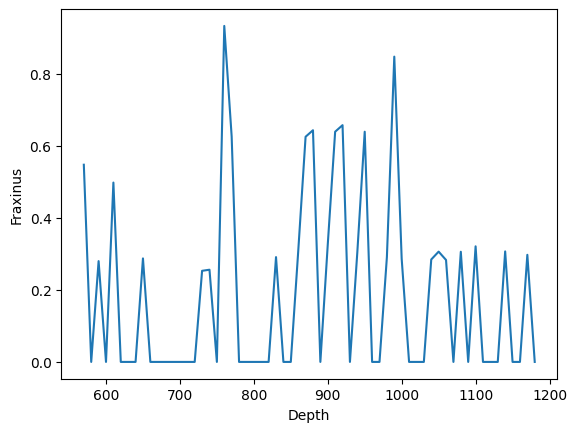

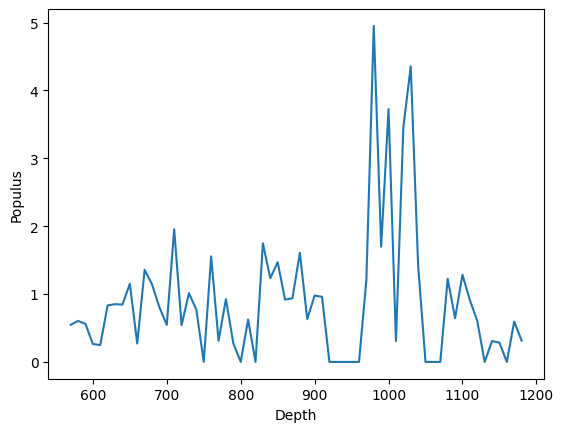

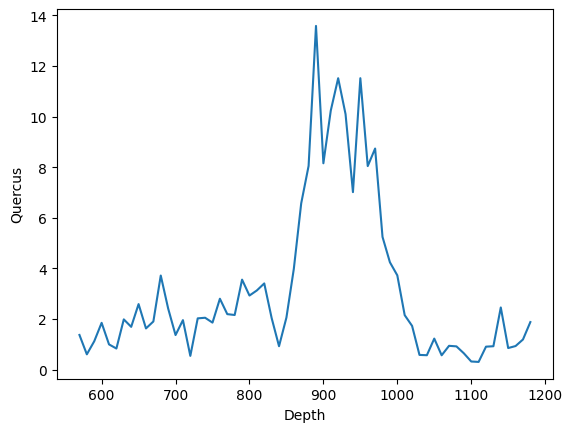

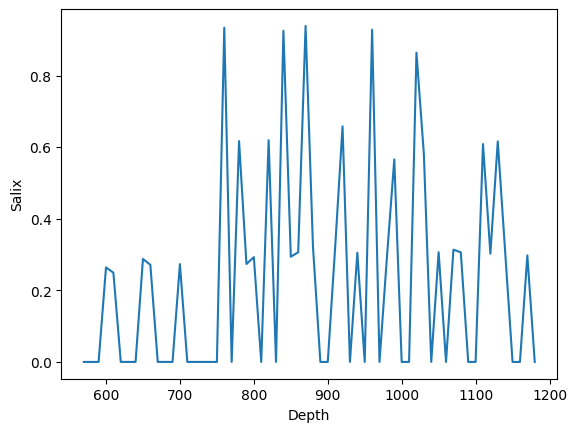

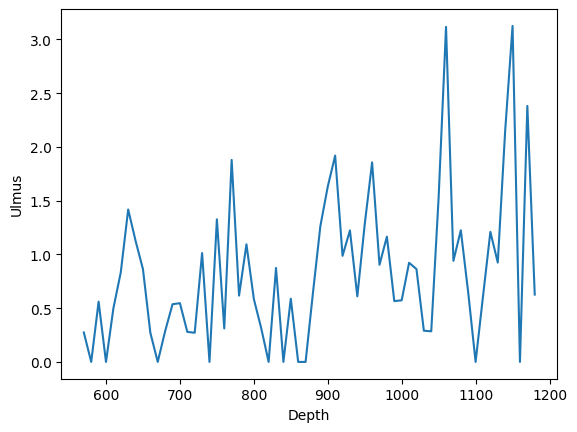

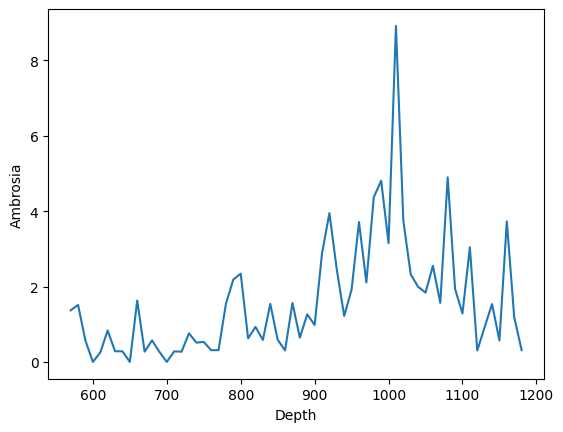

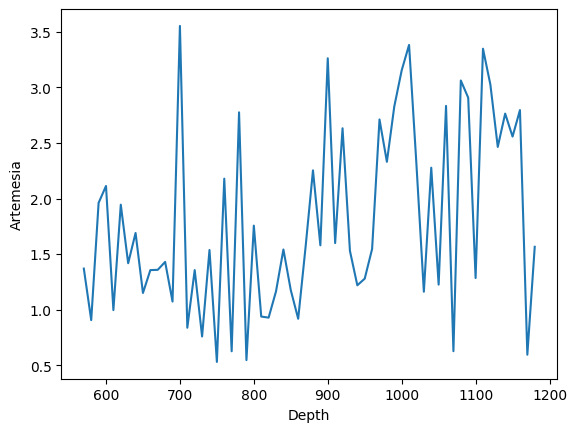

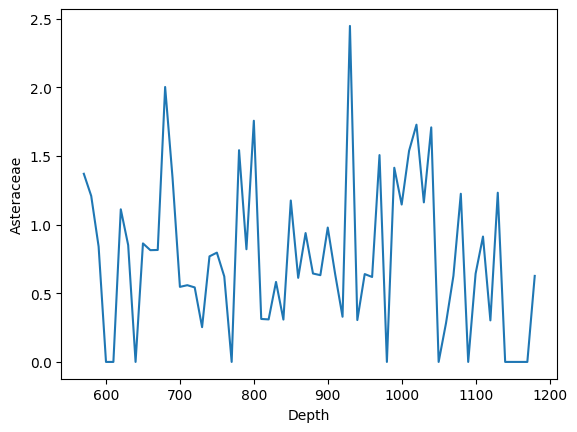

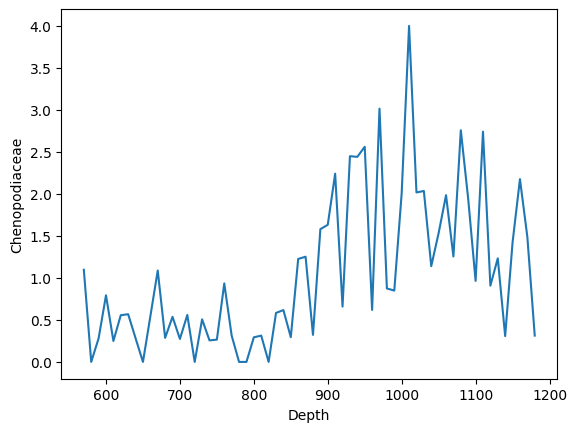

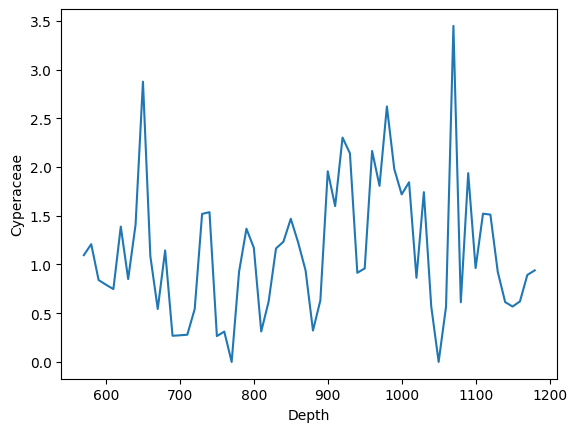

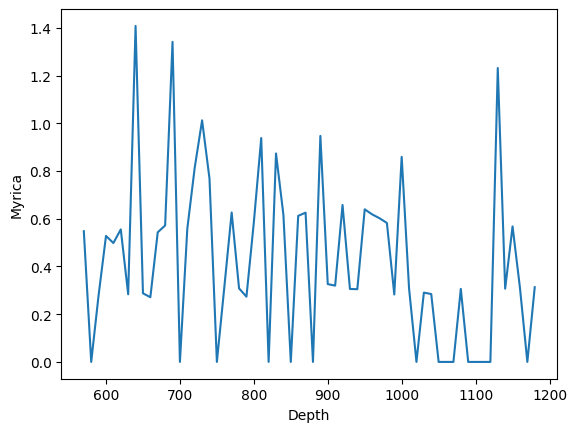

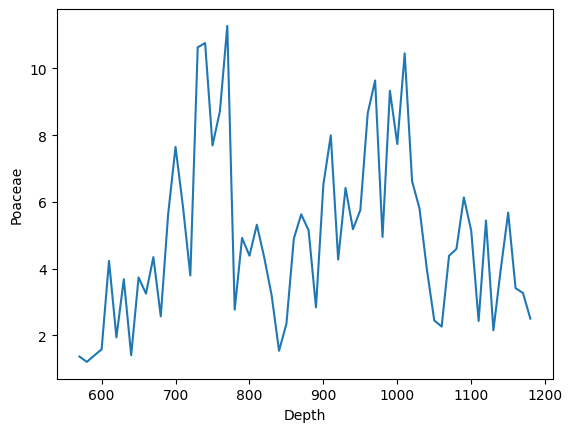

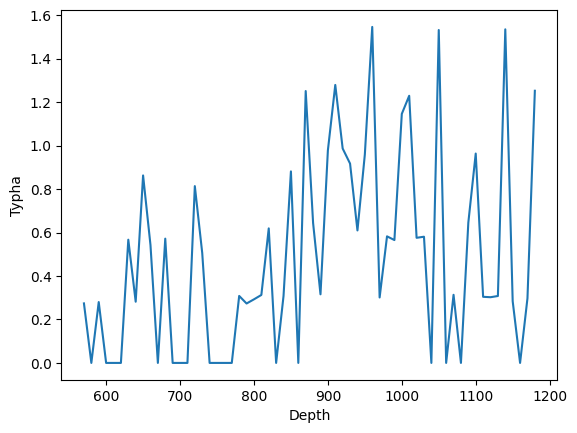

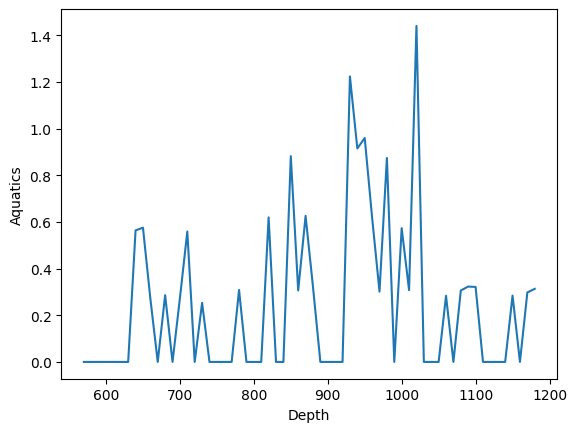

<Figure size 640x480 with 0 Axes>

In [5]:
df_pollen = df_pollen[[c for c in df_pollen.columns if c not in DISCARD_POLLEN]]

if DEBUG:
    for col in df_pollen.columns:
        if col != "Depth":
            sns.lineplot(df_pollen, x="Depth", y=col)
            plt.show()
            plt.clf()

In [6]:
df_depth = pd.read_csv("data/boreal_forest/"+CHARCOAL_ID+"_depths.csv", usecols=["depths", "Age"])
df_depth = df_depth.rename(columns={"depths":"Depth"})
display(df_depth)

# Cannot just merge because not all age for all depth and vice versa, need to find the nearest point
nearest_age = []
for target in df_depth["Age"]:
    differences = np.abs(df_charcoal['Age'] - target)
    nearest_index = differences.argsort()[0]
    nearest_age.append(df_charcoal['Age'].iloc[nearest_index])
    #print(f"Nearest value to {target} is {nearest_depth[-1]}")

df_depth["Age"] = nearest_age

display(df_depth)

df = df_charcoal.merge(df_depth, on="Age")
display(df)

df = df.merge(df_pollen, on="Depth")
display(df)

,Depth,Age
0,570,-62
1,580,-7
2,590,143
3,600,335
4,610,561
...,...,...
57,1140,9708
58,1150,9914
59,1160,10129
60,1170,10319


,Depth,Age
0,570,-62
1,580,-12
2,590,138
3,600,338
4,610,558
...,...,...
57,1140,9708
58,1150,9918
59,1160,10128
60,1170,10318


,Age,M15,Depth
0,-62,0.000000,570
1,-12,0.052147,580
2,138,0.016437,590
3,338,0.065690,600
4,558,0.098487,610
...,...,...,...
57,9708,0.002381,1140
58,9918,0.024061,1150
59,10128,0.019621,1160
60,10318,0.026405,1170


,Age,M15,Depth,Juniperus,Larix,Picea,Pinus,Alnus,Betula,Fraxinus,...,Ulmus,Ambrosia,Artemesia,Asteraceae,Chenopodiaceae,Cyperaceae,Myrica,Poaceae,Typha,Aquatics
0,-62,0.000000,570,0.273973,1.917808,16.712329,53.698630,1.917808,8.219178,0.547945,...,0.273973,1.369863,1.369863,1.369863,1.095890,1.095890,0.547945,1.369863,0.273973,0.000000
1,-12,0.052147,580,0.302115,0.604230,13.897281,62.235650,0.604230,10.574018,0.000000,...,0.000000,1.510574,0.906344,1.208459,0.000000,1.208459,0.000000,1.208459,0.000000,0.000000
2,138,0.016437,590,0.840336,1.680672,14.005602,59.383753,0.560224,9.523810,0.280112,...,0.560224,0.560224,1.960784,0.840336,0.280112,0.840336,0.280112,1.400560,0.280112,0.000000
3,338,0.065690,600,0.264085,2.640845,12.147887,52.816901,5.545775,13.204225,0.000000,...,0.000000,0.000000,2.112676,0.000000,0.792254,0.792254,0.528169,1.584507,0.000000,0.000000
4,558,0.098487,610,0.000000,1.744186,16.694352,55.315615,0.996678,9.219269,0.498339,...,0.498339,0.249169,0.996678,0.000000,0.249169,0.747508,0.498339,4.235880,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,9708,0.002381,1140,0.307062,2.456499,25.793245,31.320368,0.307062,21.494371,0.307062,...,2.149437,1.535312,2.763562,0.000000,0.307062,0.614125,0.307062,3.991812,1.535312,0.000000
58,9918,0.024061,1150,0.568182,1.136364,13.068182,51.704545,0.000000,15.909091,0.000000,...,3.125000,0.568182,2.556818,0.000000,1.420455,0.568182,0.568182,5.681818,0.284091,0.284091
59,10128,0.019621,1160,1.863354,0.621118,10.559006,57.142857,0.310559,12.422360,0.000000,...,0.000000,3.726708,2.795031,0.000000,2.173913,0.621118,0.310559,3.416149,0.000000,0.000000
60,10318,0.026405,1170,0.595238,1.785714,17.559524,54.166667,0.000000,10.119048,0.297619,...,2.380952,1.190476,0.595238,0.000000,1.488095,0.892857,0.000000,3.273810,0.297619,0.297619


c:\Users\Tony\AppData\Local\anaconda3\envs\hap2-project\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


,M15,Juniperus,Larix,Picea,Pinus,Alnus,Betula,Fraxinus,Populus,Quercus,...,Ambrosia,Artemesia,Asteraceae,Chenopodiaceae,Cyperaceae,Myrica,Poaceae,Typha,Aquatics,Poaceae_prev
1,-0.420464,-0.028997,1.200830,0.433306,-0.638953,0.332196,-0.334884,0.983754,-0.032207,0.295640,...,-0.055480,0.215729,0.114166,0.612712,-0.088505,0.592392,0.043864,0.286885,0.000000,0.157208
2,0.287932,-0.554574,-0.984048,-0.016673,0.213450,0.011129,0.149351,-0.502899,0.025181,-0.199331,...,0.374709,-0.490753,0.260386,-0.156611,0.289429,-0.302834,-0.052207,-0.293314,0.000000,0.138685
3,-0.397131,0.593760,-0.877758,0.285948,0.491496,-1.260813,-0.523396,0.502899,0.169458,-0.281163,...,0.220888,-0.070693,0.594398,-0.286338,0.037804,-0.268178,-0.049991,0.293314,0.000000,0.160731
4,-0.264452,0.272108,0.819696,-0.699814,-0.187016,1.150437,0.566705,-0.894693,0.008535,0.328956,...,-0.098244,0.519403,0.000000,0.303638,0.035180,0.032250,-0.720554,0.000000,0.000000,0.181841
5,0.075200,0.000000,0.832671,1.030427,-0.059539,-0.731421,-0.585065,0.894693,-0.334272,0.063073,...,-0.230327,-0.441105,-0.785926,-0.171301,-0.504271,-0.061858,0.622735,0.000000,0.000000,0.486118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.074493,-0.316392,-1.964079,-2.547917,1.620921,0.000239,-0.034387,-0.551285,-0.175708,-0.591746,...,-0.241022,-0.139390,0.871458,0.517151,0.243652,1.000000,-0.498896,-1.285148,0.000000,0.247433
58,-0.174809,-0.269053,1.206824,1.958703,-1.525653,0.077654,0.794288,0.551285,0.013145,0.619452,...,0.381326,0.096222,0.000000,-0.622498,0.036122,-0.282300,-0.459287,1.310192,-0.458807,0.458108
59,0.035799,-1.334524,0.471020,0.386224,-0.407030,-0.078538,0.495852,0.000000,0.162563,-0.030661,...,-1.245362,-0.110868,0.000000,-0.421259,-0.041620,0.278520,0.615732,0.297480,0.458807,0.652056
60,-0.054700,1.306646,-1.064635,-1.077553,0.222753,0.078538,0.327556,-0.534331,-0.340608,-0.099932,...,1.000000,1.023818,0.000000,0.383441,-0.213649,0.335750,0.038683,-0.311646,-0.480655,0.392044


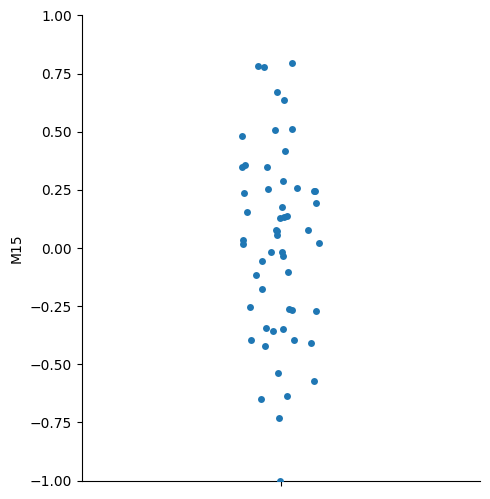

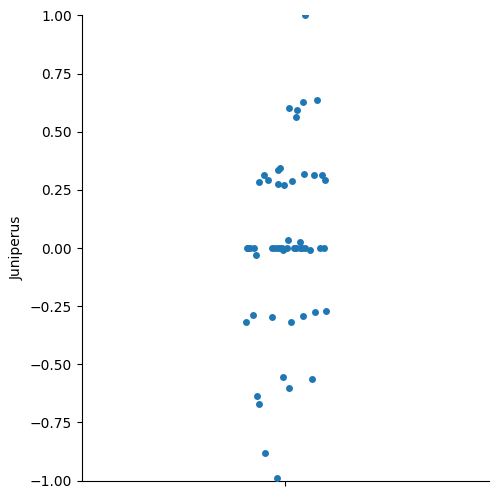

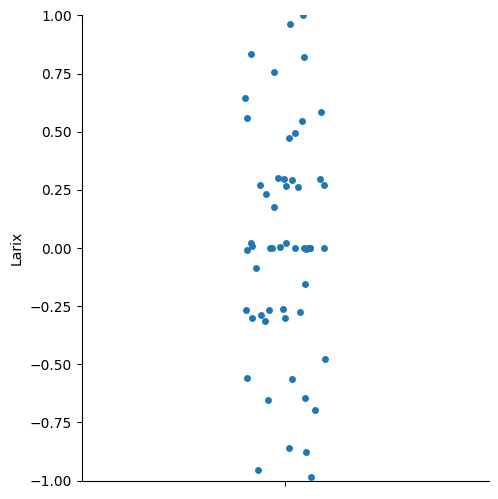

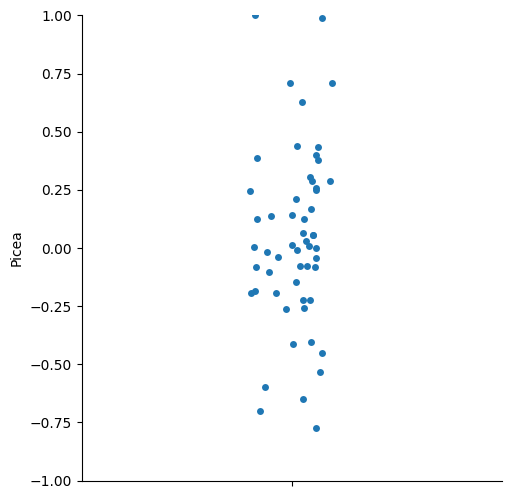

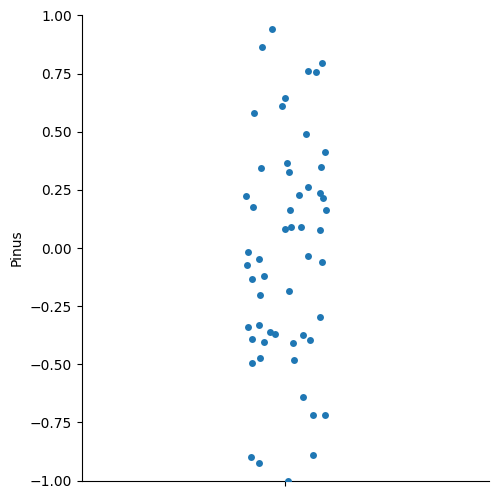

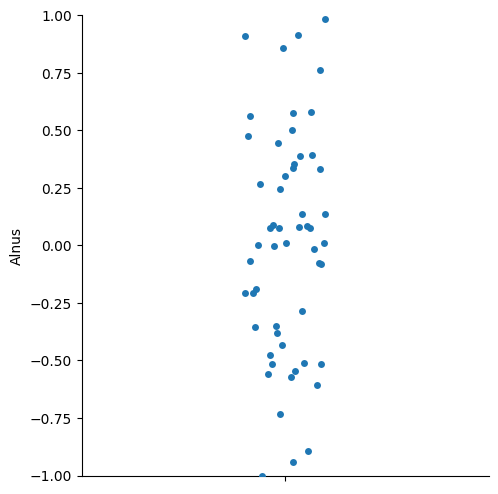

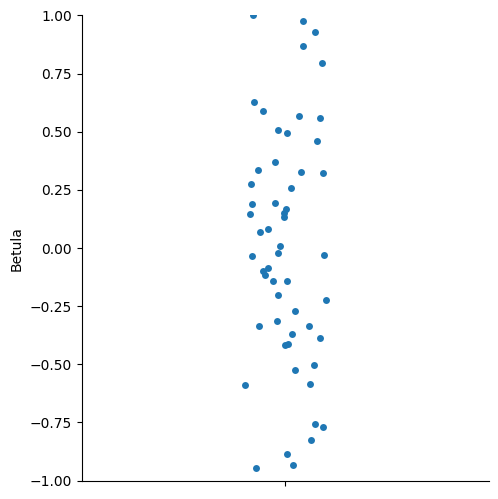

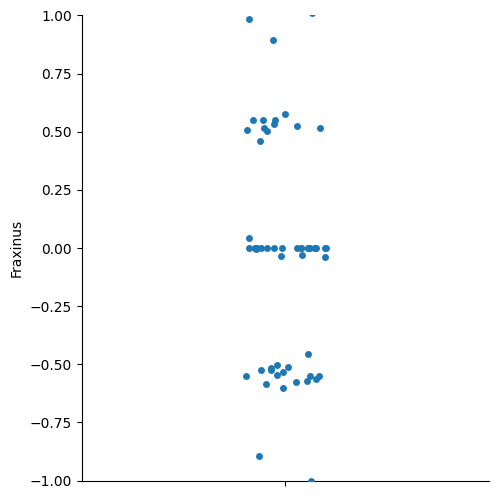

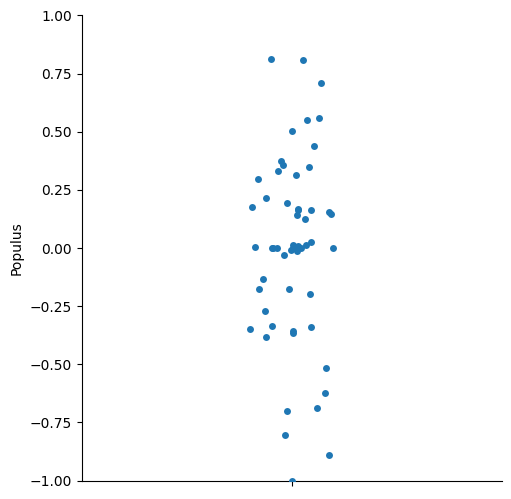

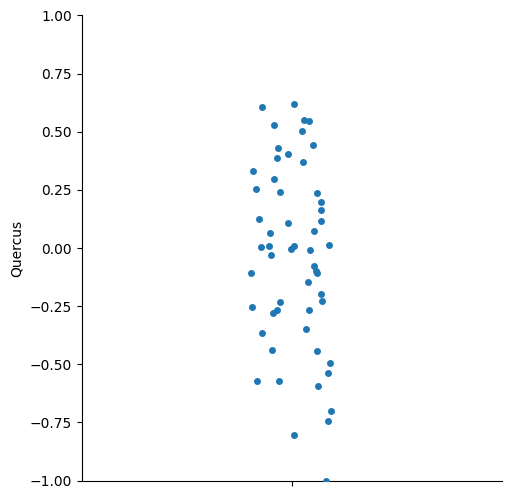

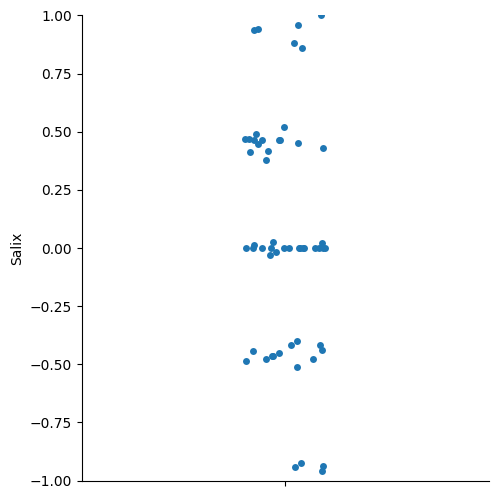

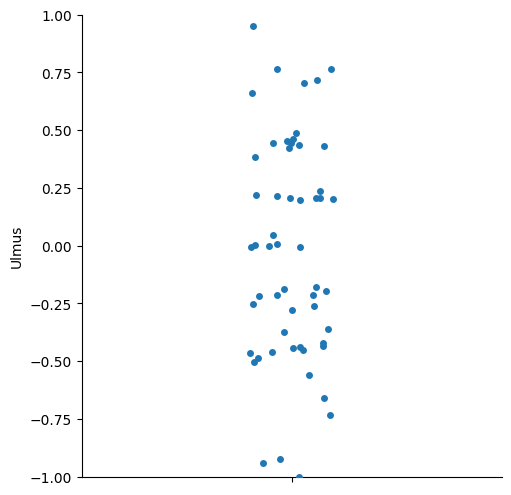

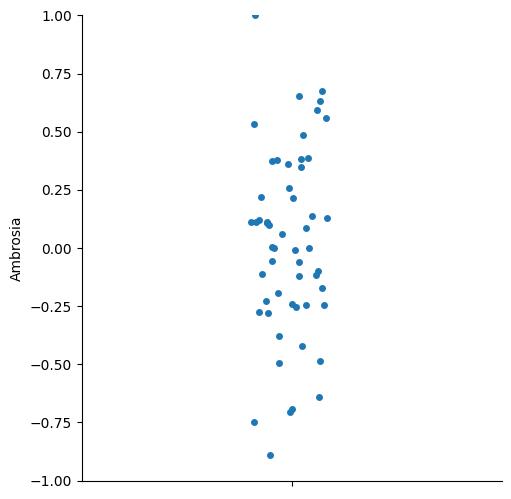

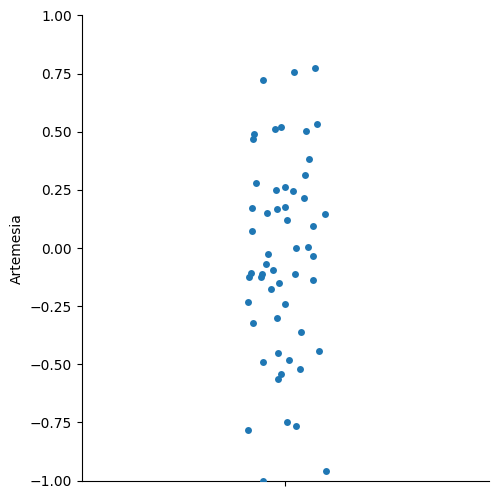

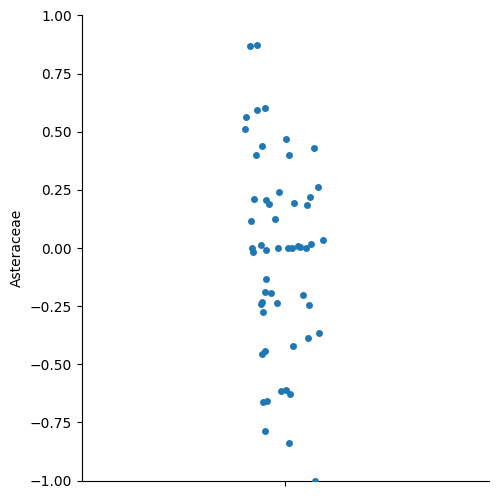

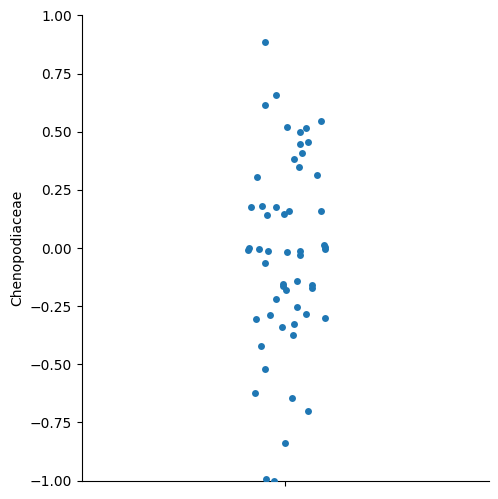

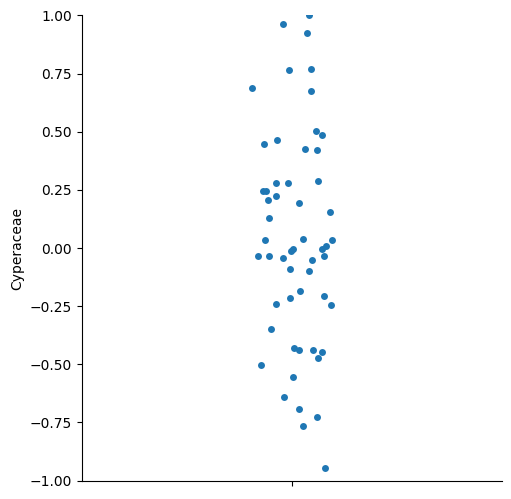

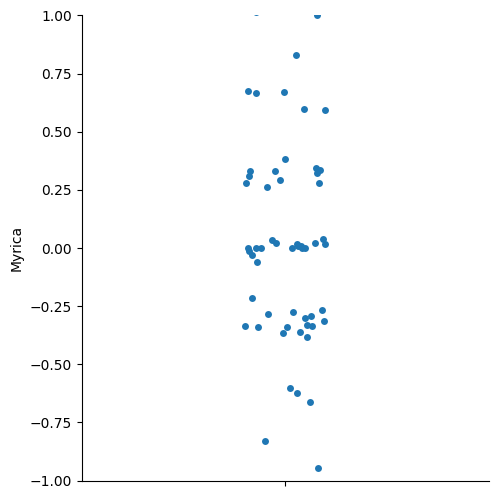

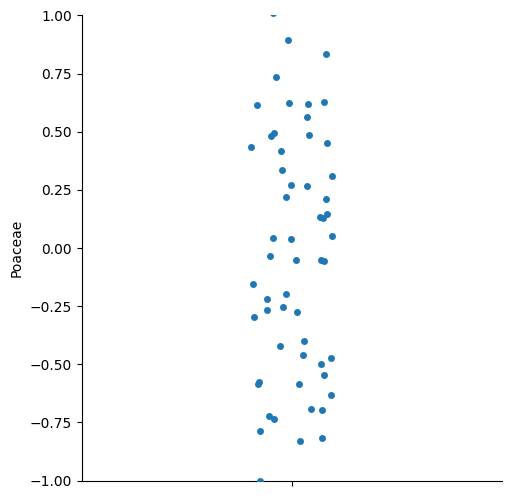

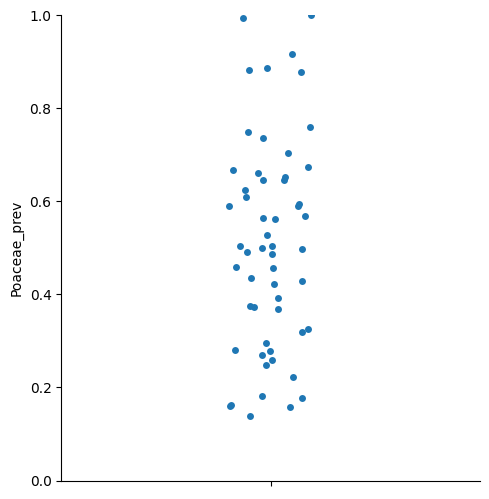

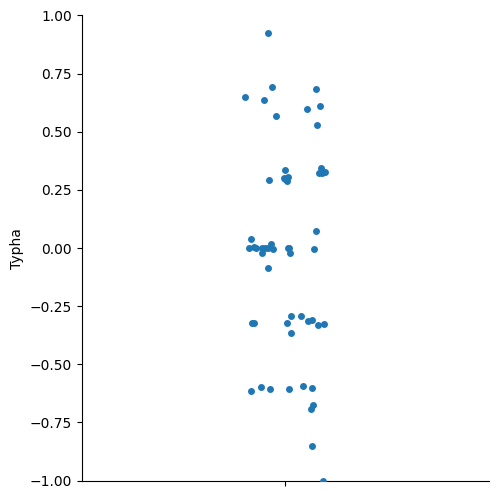

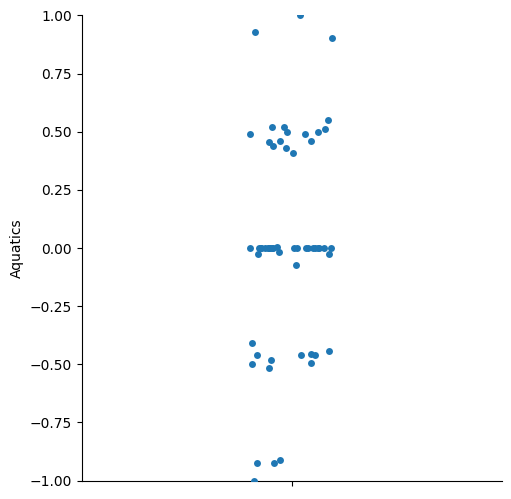

In [7]:
# Clean usable columns
df = df.drop(columns=["Age", "Depth"])

# Remove space from col name
df.columns = df.columns.str.replace(' ', '_')


for col in df.columns:
    df[col+"_prev"] = df[col].shift()
    df[col] = df[col+"_prev"] - df[col]
    #df = df.drop(columns=TARGET)
    df[col] = df[col] / df[col].abs().quantile(0.9)
    g = sns.catplot(data=df, y=col)
    g.set(ylim=(-1, 1))
    if col == TARGET:
        df[col+"_prev"] = df[col+"_prev"] / df[col+"_prev"].abs().quantile(0.9)
        g = sns.catplot(data=df, y=col+"_prev")
        g.set(ylim=(0, 1))
    else:
        df = df.drop(columns=col+"_prev")


# Compute change of charcoal
#df["charcoal_change"] = df[CHARCOAL_ID].shift()
#df["charcoal_change"] = df["charcoal_change"] - df[CHARCOAL_ID]

#df = df[(df["charcoal_change"] > -1) & (df["charcoal_change"] < 1)]
#sns.catplot(data=df, y="charcoal_change")

#df["charcoal_change"] = df["charcoal_change"].apply(lambda x: "up" if x > 0 else "down")
#df["charcoal_change"] = df["charcoal_change"].apply(lambda x: x > 0)
#df = df.drop(axis=1, columns=CHARCOAL_ID)
df = df.dropna()

display(df)

df.to_csv(PROCESSED_DATA_PATH, index=False)

# Analysis

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

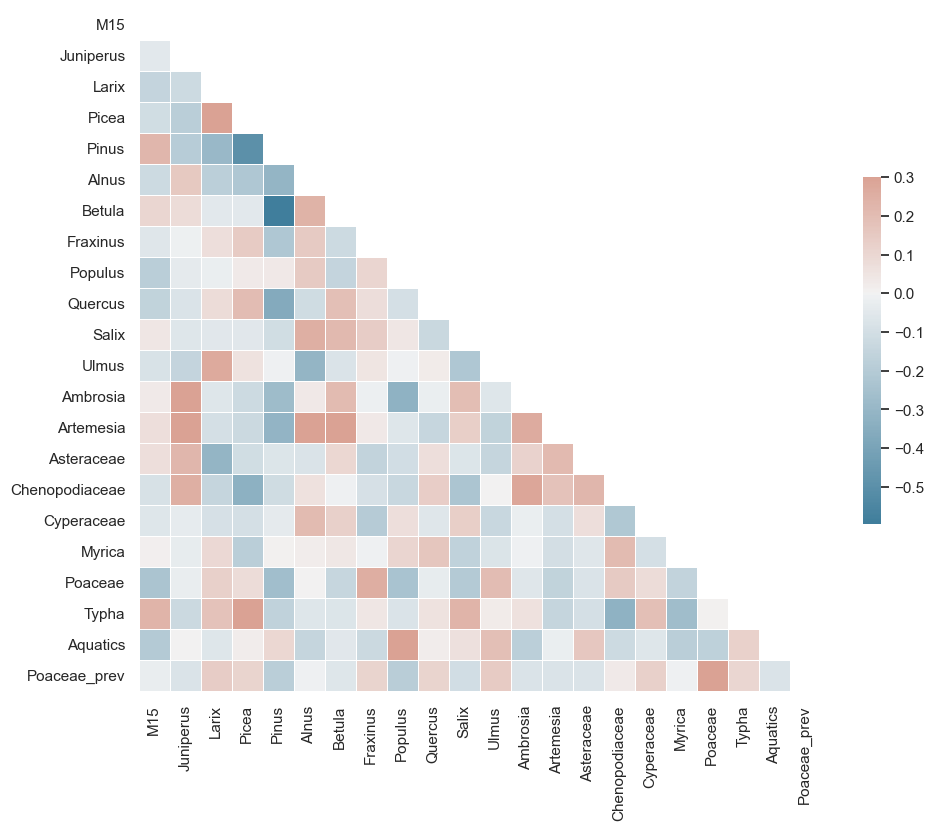

In [9]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.select_dtypes(include=["number"]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Discretisation

In [10]:
DISCRETE_ENCODING_PATH = "tmp/discrete_encoding.csv"
DISCRETE_DATA_PATH = "tmp/data_discrete.csv"
MAX_VALUES = 3
RANDOM_SEED = 0
PRECISION = 3

In [11]:
import numpy
from sklearn import mixture

def encode_quantity(x, tresholds):
    if numpy.isnan(x):
        return numpy.nan
    level = 0
    for i in tresholds:
        if i > x:
            return level
        level += 1
    return level

for i in [-0.5,0,0.5]:
    print(i, encode_quantity(i,DISCRETIZATION_TRESHOLDS))

def encode_tendancy(x, tresholds):
    if numpy.isnan(x):
        return numpy.nan
    level = int(-len(tresholds)/2)
    for i in tresholds:
        if i > x:
            return level
        level += 1
    return level

for i in [-0.5,0,0.5]:
    print(i, encode_tendancy(i,DISCRETIZATION_TRESHOLDS))

-0.5 0
0 1
0.5 2
-0.5 -1
0 0
0.5 1


In [12]:
import warnings

df_tmp = df.copy()

discretization = {}

categorical_cols = [i for i in list(df_tmp.select_dtypes(exclude=["number"]).columns)]# + ["charcoal_change"]

display(categorical_cols)

non_categorical_cols = [c for c in df_tmp.columns if c not in categorical_cols and c != TARGET+"_prev"]

print("Computing discrete levels for",len(non_categorical_cols),"variables...")
for idx, col in enumerate(non_categorical_cols):
    print("\r",idx+1,"/",len(non_categorical_cols),end="")
    discretization[col] = DISCRETIZATION_TRESHOLDS

discretization[TARGET+"_prev"] = [df_tmp[TARGET+"_prev"].quantile(0.25),df_tmp[TARGET+"_prev"].quantile(0.75)]

print()

df_encoding = pd.DataFrame(list(discretization.items()), columns=["Variable","Thresholds"])
df_encoding.to_csv(DISCRETE_ENCODING_PATH, index=False)
display(df_encoding)

print("Encoding data")
dataset_cat_col = [i for i in categorical_cols if i in df_tmp.columns]
df_discretised = df_tmp[dataset_cat_col].copy()
for idx, col in enumerate(non_categorical_cols):
    if col in df_tmp.columns:
        df_discretised[col] = df_tmp[col].apply(lambda x: encode_tendancy(x, discretization[col])).astype('Int64')

df_discretised[TARGET+"_prev"] = df_tmp[TARGET+"_prev"].apply(lambda x: encode_quantity(x, discretization[TARGET+"_prev"])).astype('Int64')

display(df_discretised)
df_discretised.to_csv(DISCRETE_DATA_PATH, index=False)
print("Saved to",DISCRETE_DATA_PATH)

[]

Computing discrete levels for 21 variables...
 21 / 21


,Variable,Thresholds
0,M15,"[-0.01, 0.01]"
1,Juniperus,"[-0.01, 0.01]"
2,Larix,"[-0.01, 0.01]"
3,Picea,"[-0.01, 0.01]"
4,Pinus,"[-0.01, 0.01]"
5,Alnus,"[-0.01, 0.01]"
6,Betula,"[-0.01, 0.01]"
7,Fraxinus,"[-0.01, 0.01]"
8,Populus,"[-0.01, 0.01]"
9,Quercus,"[-0.01, 0.01]"


Encoding data


,M15,Juniperus,Larix,Picea,Pinus,Alnus,Betula,Fraxinus,Populus,Quercus,...,Ambrosia,Artemesia,Asteraceae,Chenopodiaceae,Cyperaceae,Myrica,Poaceae,Typha,Aquatics,Poaceae_prev
1,-1,-1,1,1,-1,1,-1,1,-1,1,...,-1,1,1,1,-1,1,1,1,0,0
2,1,-1,-1,-1,1,1,1,-1,1,-1,...,1,-1,1,-1,1,-1,-1,-1,0,0
3,-1,1,-1,1,1,-1,-1,1,1,-1,...,1,-1,1,-1,1,-1,-1,1,0,0
4,-1,1,1,-1,-1,1,1,-1,0,1,...,-1,1,0,1,1,1,-1,0,0,0
5,1,0,1,1,-1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,-1,-1,-1,1,0,-1,-1,-1,-1,...,-1,-1,1,1,1,1,-1,-1,0,0
58,-1,-1,1,1,-1,1,1,1,1,1,...,1,1,0,-1,1,-1,-1,1,-1,1
59,1,-1,1,1,-1,-1,1,0,1,-1,...,-1,-1,0,-1,-1,1,1,1,1,1
60,-1,1,-1,-1,1,1,1,-1,-1,-1,...,1,1,0,1,-1,1,1,-1,-1,1


Saved to tmp/data_discrete.csv


c:\Users\Tony\AppData\Local\anaconda3\envs\hap2-project\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


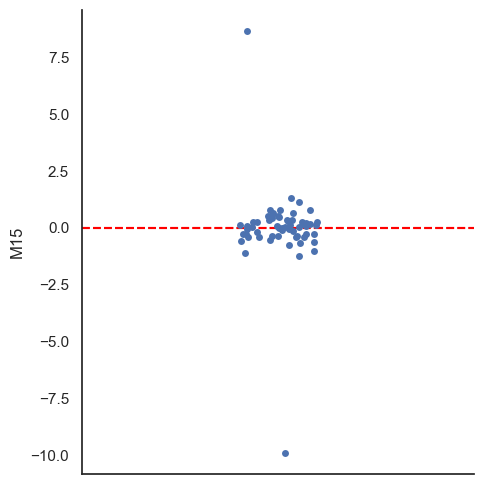

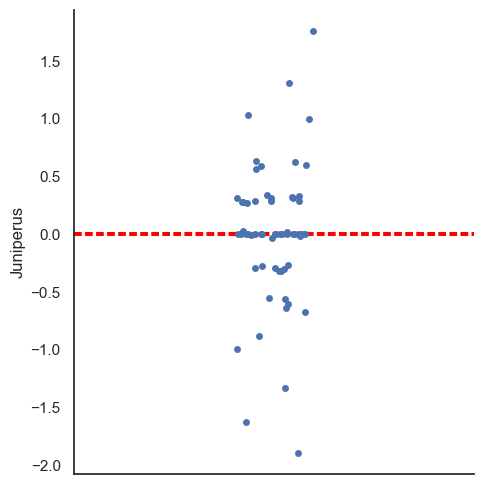

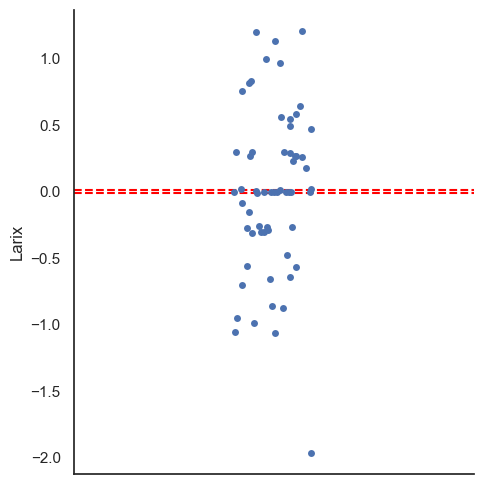

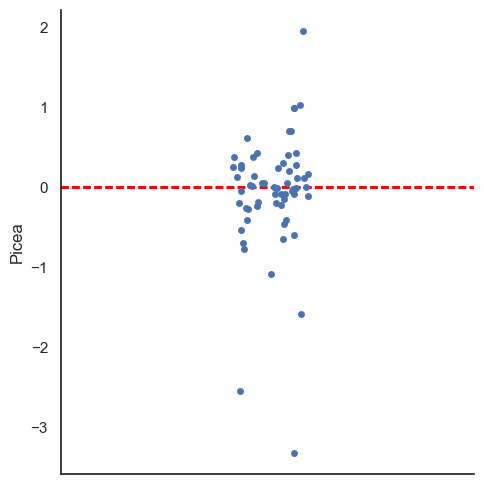

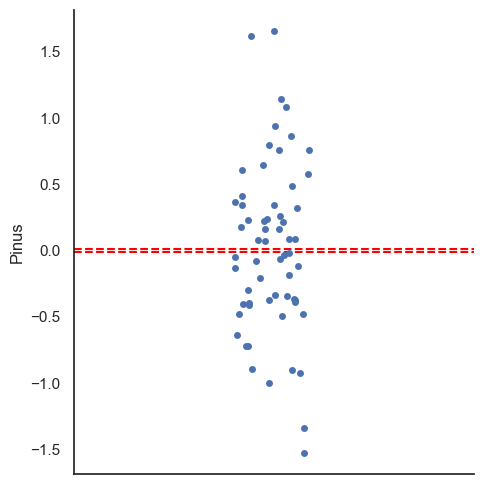

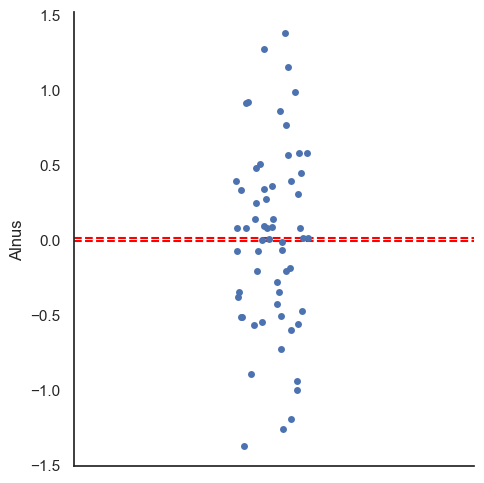

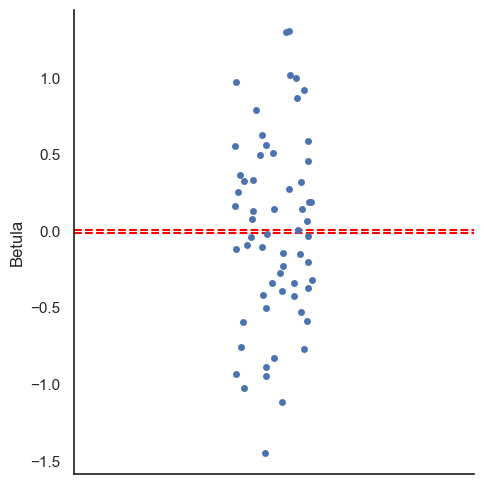

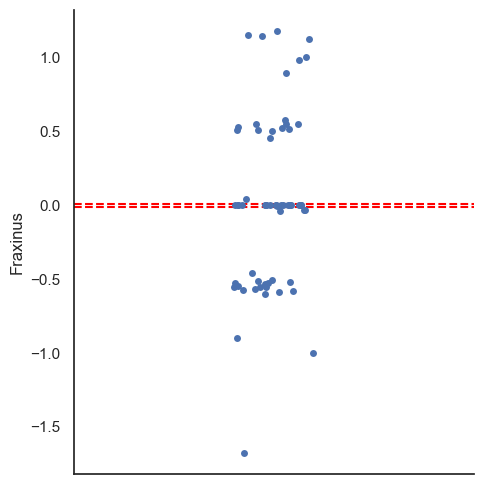

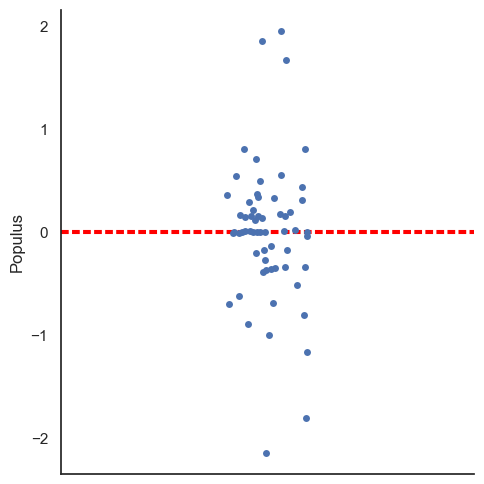

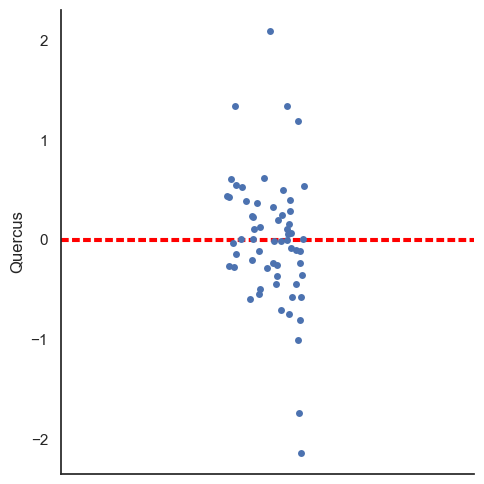

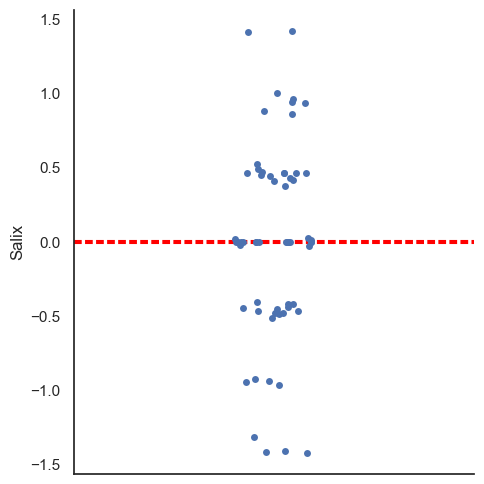

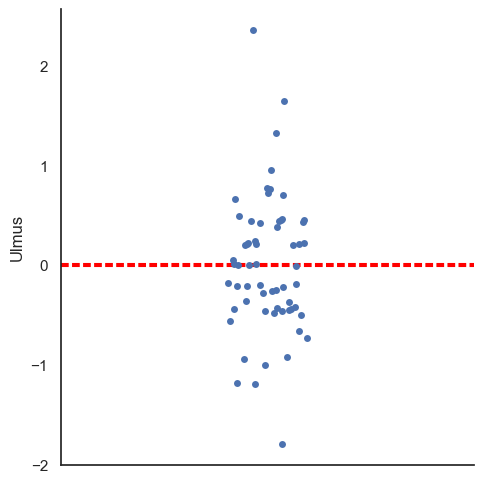

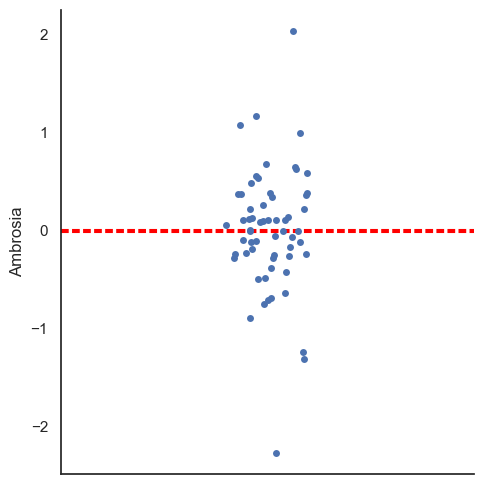

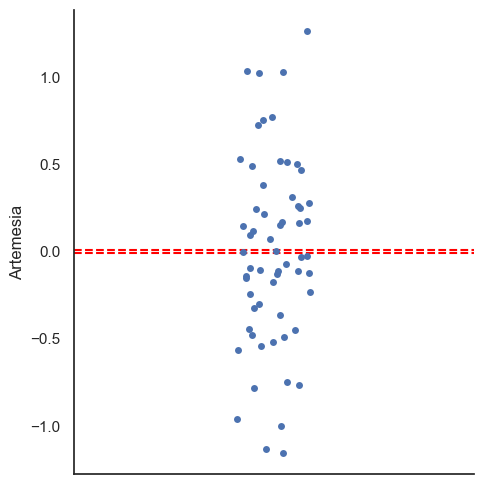

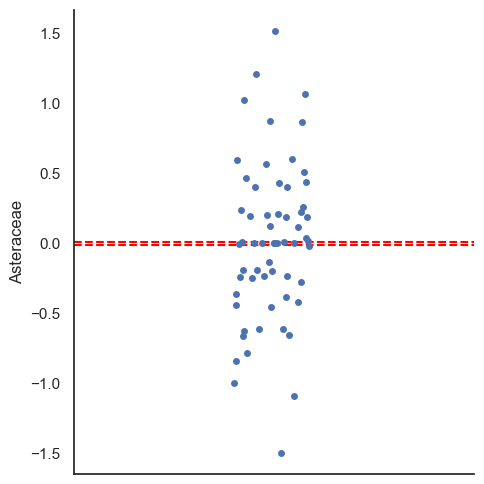

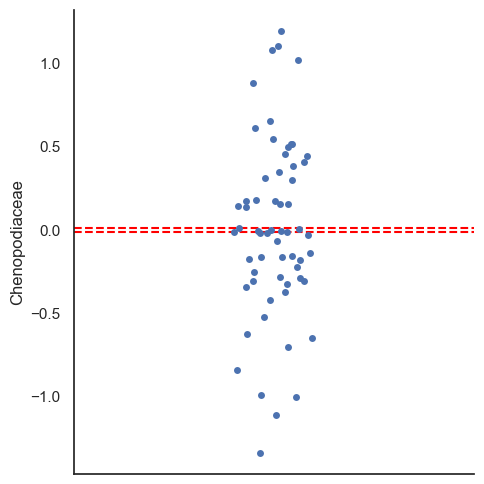

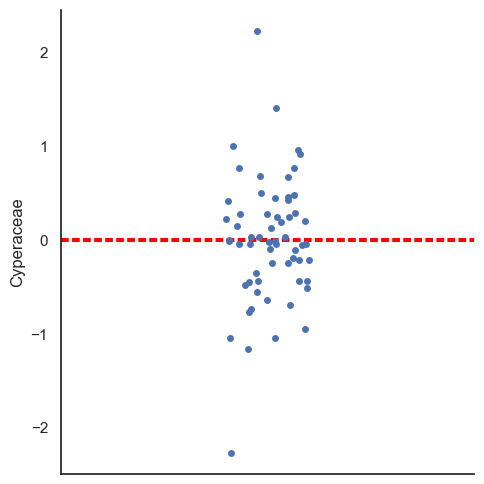

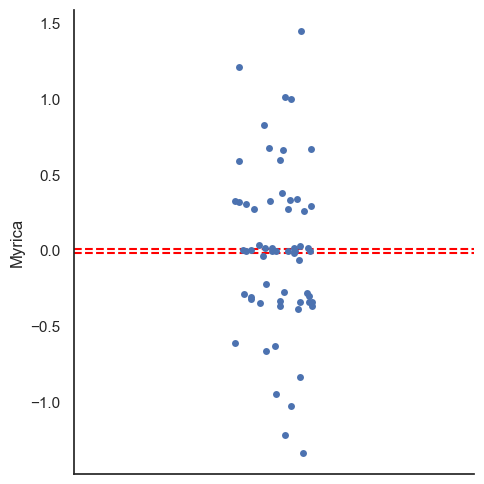

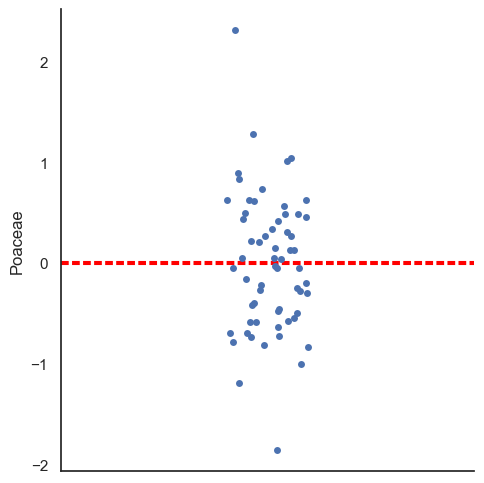

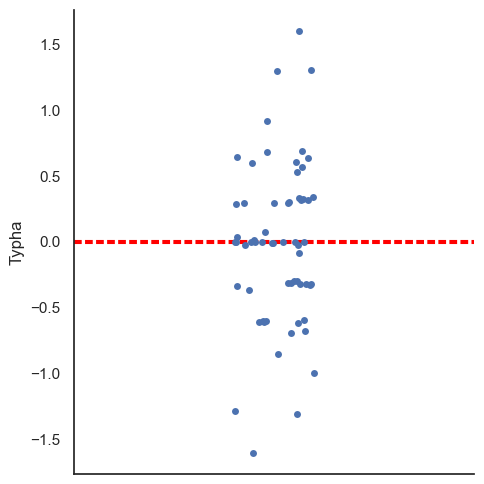

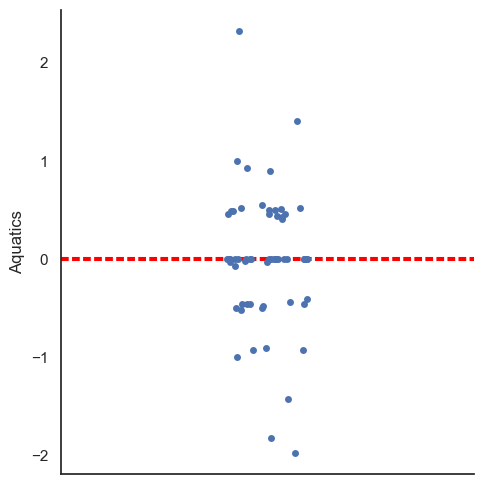

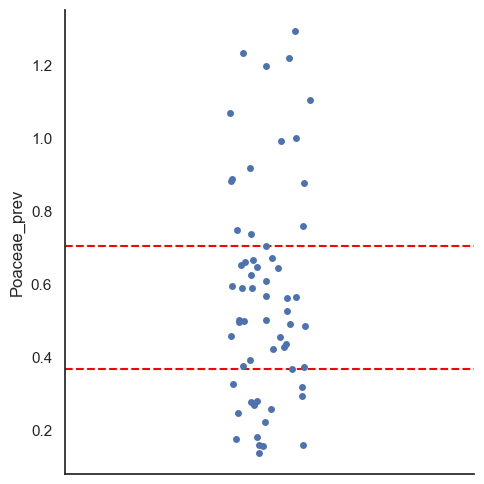

In [13]:
import seaborn as sns

for col in discretization:
    g = sns.catplot(df, y=col)
    for lvl in discretization[col]:
        g.refline(y=lvl, color='red', linestyle='--', label='Threshold')